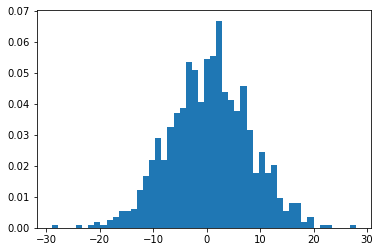

In [1]:
# Lab Partners: Akaash Chikarmane, Sean Tremblay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gaussian1 = np.random.normal(-10, 5, 1000)
gaussian2 = np.random.normal(10, 5, 1000)
gaussian3 = gaussian1 + gaussian2

count, bins, ignored = plt.hist(gaussian3, 50, normed=True)
plt.show()

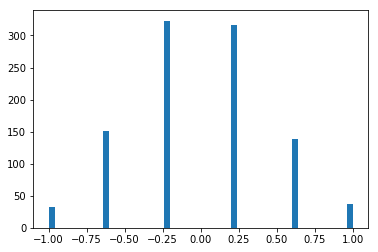

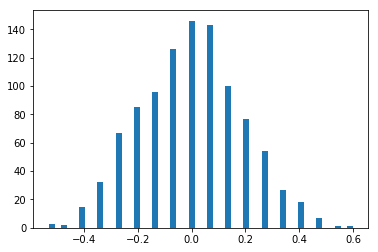

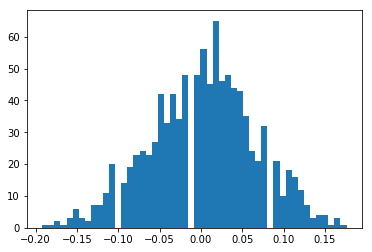

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

def Zn(n, draws):
    Zarray = np.zeros(draws)
    for i in range(draws):
        p = 0.5
        x0 = bernoulli.rvs(p, size=n)
        x1 = np.array(x0)
        np.place(x1, x0==0, -1)
        Zarray[i] = (1/n)*np.sum(x1)
    return Zarray

Z = Zn(5, 1000)
plt.hist(Z, 50)
plt.figure()
Z = Zn(30, 1000)
plt.hist(Z, 50)
plt.figure()
Z = Zn(250, 1000)
plt.hist(Z, 50)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Expected_value(n, samples):
    ret = np.divide(np.sum(samples), n)
    return ret


num_samples = 25000
mu, sigma = 0, 5
samples = np.random.normal(mu, sigma, num_samples)
mean = Expected_value(num_samples, samples)

dummy_mean = np.full(num_samples, mean)
difference = np.subtract(samples, dummy_mean)
diff_sq = np.multiply(difference, difference)
variance = Expected_value(num_samples-1, diff_sq)

print("mean = ", mean)
print("sigma_square = ", variance)

mean =  0.010602454115
sigma_square =  24.9353874523


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Expected_value(n, samples):
    val0 = 0
    val1 = 0
    for sample in samples:
        val0 = val0 + sample[0]
        val1 = val1 + sample[1]
        
    val0 = np.divide(val0, n)
    val1 = np.divide(val1, n)
    return [val0, val1]

num_samples = 10000
cov_matrix = [[20, .8], [.8, 30]]
samples = np.random.multivariate_normal([-5, 5], cov_matrix, (num_samples))

# Calculating mean
mean = Expected_value(num_samples, samples)
print("mean = ", mean)

## Covariance matrix

# Basically transpose samples matrix to make for easier covariance calculations
sampleX = np.zeros(num_samples)
sampleY = np.zeros(num_samples)
for i in range(num_samples):
    sampleX[i] = samples[i][0]
    sampleY[i] = samples[i][1]    
samples_cov = np.array([sampleX, sampleY])

# Mean matrix for easier covariance calculations
dummy_mean_X = np.full(num_samples, mean[0])
dummy_mean_Y = np.full(num_samples, mean[1])
dummy_mean = np.array([dummy_mean_X, dummy_mean_Y])

cov = np.zeros([2, 2])
# Actual covariance calculations
for i in range(2):
    for j in range(2):        
        difference_i = np.subtract(samples_cov[i], dummy_mean[i])
        difference_j = np.subtract(samples_cov[j], dummy_mean[j])
        diff_mult = np.multiply(difference_i, difference_j)
        cov[i][j] = np.divide(np.sum(diff_mult), num_samples-1)
print("Covariance matrix: ")
print(cov)

mean =  [-4.9729256088957596, 4.94477819839235]
Covariance matrix: 
[[ 20.045129     0.83039927]
 [  0.83039927  29.77717671]]


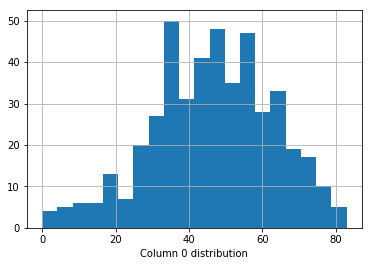

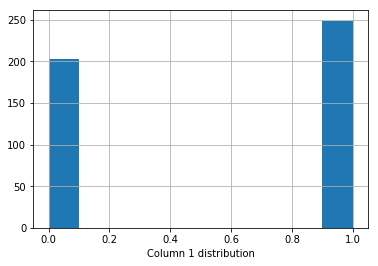

           0           2
1                       
0  47.546798  171.315271
1  45.594378  162.008032


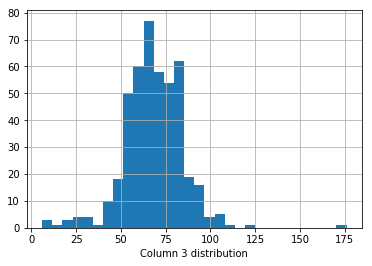

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Questions ###
# a) There are 452 patients and 280 features.
# b) Column 0: is probably age because of the concentration around the middle, the low number of patients in the beginning bins, and the sudden dropoff around the 67 or 70 year mark.
#    Column 1: is probably gender since the data given only has two choices and the distribution is approaching even (0 = 202, 1 = 250). Since the average height of 0 is 171cm and
#             the average height of 1s is 162cm, 0 probably indicates male while 1 probably indicates female.
#    Column 2: is probably height in centimeters because it's so concentrated between 155 (~5'2") and 175 (~5'10") range. The average male height in the U.S. is around 5'10" while the average female height is around 5'4".
#    Column 3: the majority of patients appear to have col3 reading between 50 and 80 with one notable outlier at 175. It could be a a mistake, like the two outliers from col2, but it's best to assume they are true readings.
#                since we are assuming the metric system for column 2, if we conclude the third column refers to weight in kg, it makes sense. Even the 175 kg outlier, while overweight provides a plausible weight for column 3 as the weight column
# c) Yes there are missing values. This can be seen by printing df_na_columns or by running and printing df.isnull().any().any().
# d) One way to test which features influence one another would be to assign any two features, plot it, and check correlation. This is likely to be a very slow method and it might not work if the data is not in the form of strictly numbers
#    if it's something checking whether or not gender affects certain features. I think the best way to do it would be to groupby() a certain column and see if there are any trends that stick out as possibly related then manipulate the data
#    in other ways such as create histogram or plot to see if it's possible to see a further possible correlation. Linear regression and checking the error value of each data point is also an option.
# I would say the three most important features are (1) Condition (2) Gender and (3) Age since the last can make certain conditions more likely to occur and they affect the treatment regimen of the patient.
#     Condition is the most important feature because it is the absolute deciding factor in the treatment of the patient and 

df = pd.read_csv('PatientData.csv', header=None, na_values='?') # header=None so that top row isn't seen as column indices

## Column 0 analysis
df[0].hist(bins=20)
plt.xlabel('Column 0 distribution')
plt.show()

## Column 1 analysis
plt.figure()
df[1].hist(bins=10)
plt.xlabel('Column 1 distribution')
plt.show()
df2 = df[[0, 1, 2]]
df3 = df2.groupby(1).mean()
print(df3)

##Column 2 analysis 
df[2].value_counts()

## Column 3 analysis
plt.figure()
df[3].hist(bins=30)
plt.xlabel('Column 3 distribution')
plt.show()

## Replacing missing value (NaN)
rows, columns = df.shape
df_na = df.isnull() # to tell if the entry is NaN
df_na_columns = df.isnull().any() # to tell if the column contains NaN
df_mean = np.zeros(columns) # used to store column averages
df_sum = df.sum(axis=1) # mean calculation (total in column)
df_dummy = df.notnull().sum() # how many entries are non-NaN for averaging
df_defined = np.array(df_dummy, dtype=int) # put it into numpy array
for column in range(columns):
    df_mean[column] = df_sum[column]
df_mean = np.divide(df_mean, df_defined) # final mean calculation

for column in range(columns):
    if(df_na_columns[column]):
        for row in range(rows):
            if(df_na[column][row]):
                df[column][row] = df_mean[column] # replacing NaN values